<a href="https://colab.research.google.com/github/Kwasi-Dankwa/airbnb-eda/blob/main/AirBnB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cleaning Process**

In [3]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels as sm

#Load data
df = pd.read_csv("/content/Airbnb_Open_Data.csv")
print(df.head())

        id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United St

<ipython-input-3-ce94ab2ceecf>:9: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/Airbnb_Open_Data.csv")


In [7]:
# checking the dimensions of the airbnb dataset

print(df.shape)
print(df.columns)


(102599, 26)
Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')


Apart from id, host id and room type most colums have missing values which must be sorted out


In [8]:
# check for missing values in the columns
print(df.isnull().sum())




id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
country                              532
country code                         131
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules     

I removed country code column because every property was based in USA

In [9]:
# Dropping records with missing 'name' or 'host name'
df.dropna(subset=['NAME', 'host name'], inplace=True)

# Convert 'last review' to datetime and handle errors
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

# Fill missing values
df.fillna({'reviews per month': 0, 'last review': df['last review'].min()}, inplace=True)

# finding new dimensions now
print(df.shape)



(101949, 26)


In [16]:
# Remove dollar signs and convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

df.drop('country code', axis=1, inplace=True)

# remove duplicates in the data
df.drop_duplicates(inplace=True)

# this confirms country code has been removed and other columns Dtypes have been coverted
print(df.info())





<class 'pandas.core.frame.DataFrame'>
Index: 101410 entries, 0 to 102057
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              101410 non-null  int64         
 1   NAME                            101410 non-null  object        
 2   host id                         101410 non-null  int64         
 3   host_identity_verified          101134 non-null  object        
 4   host name                       101410 non-null  object        
 5   neighbourhood group             101384 non-null  object        
 6   neighbourhood                   101394 non-null  object        
 7   lat                             101402 non-null  float64       
 8   long                            101402 non-null  float64       
 9   country                         100884 non-null  object        
 10  instant_bookable                101314 non-null  object      

In [17]:
# Drop rows where 'NAME' is "Unknown" for simplicity
df = df[df['NAME'] != "Unknown"]


In [18]:
# Downloading cleaned data

from google.colab import files

# Save the cleaned DataFrame to a new CSV file.
df.to_csv('cleaned_airbnb_data.csv', index=False)  # index=False prevents writing row indices

# Download the file.
files.download('cleaned_airbnb_data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Visualization**

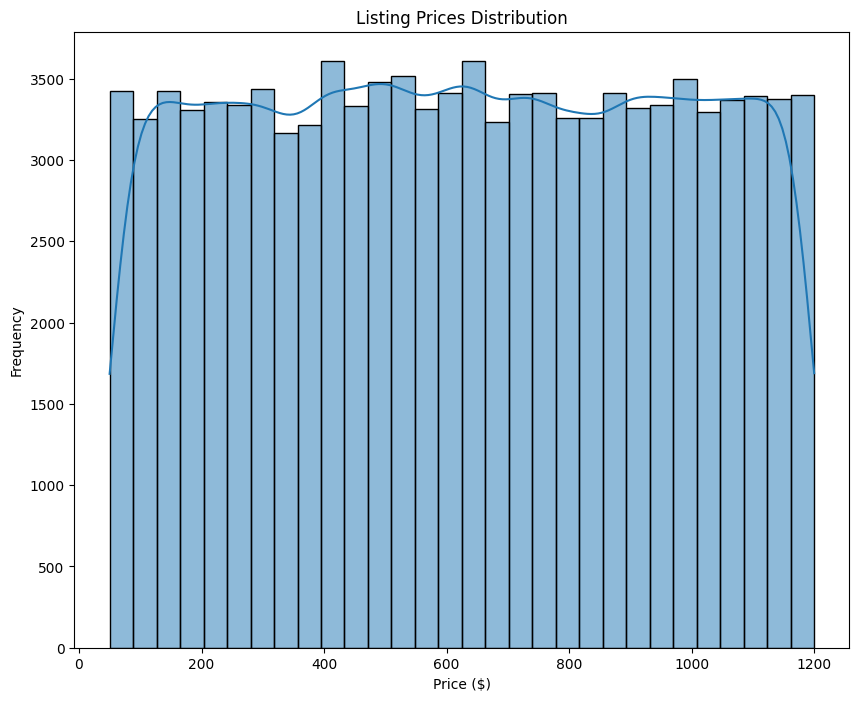

In [13]:
plt.figure(figsize=(10, 8))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Listing Prices Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

In summary, this graph indicates a listing price distribution where prices within the $0 to $1200 range are fairly evenly represented in the dataset. While there are some minor variations in frequency across different price points, there isn't a strong central price or a highly skewed distribution. This could suggest a diverse marketplace with listings available across a broad range of prices.